In [2]:
using DataFrames
using JSON
using Iterators
using taxis
using HDF5, JLD
using Interact
using Gadfly
using Color
using Stats
using kNN
using sequenceCompare

#reload("taxis")

nprocs()

8

In [3]:
taxi_df, taxi_validation_df = taxis.LoadData("/home/tony/ML/taxi/taxi2_time/train_100k.csv", 
                                        "/home/tony/ML/taxi/taxi2_time/test.csv")


Begin
loading csv files
loading coords
getting coords counts
deleting unneeded data rows/columns
done!


(99632x13 DataFrame
| Row   | TRIP_ID             | CALL_TYPE | ORIGIN_CALL | ORIGIN_STAND |
|-------|---------------------|-----------|-------------|--------------|
| 1     | 1372636858620000589 | "C"       | NA          | NA           |
| 2     | 1372637303620000596 | "B"       | NA          | 7            |
| 3     | 1372636951620000320 | "C"       | NA          | NA           |
| 4     | 1372636854620000520 | "C"       | NA          | NA           |
| 5     | 1372637091620000337 | "C"       | NA          | NA           |
| 6     | 1372636965620000231 | "C"       | NA          | NA           |
| 7     | 1372637210620000456 | "C"       | NA          | NA           |
| 8     | 1372637299620000011 | "C"       | NA          | NA           |
| 9     | 1372637274620000403 | "C"       | NA          | NA           |
| 10    | 1372637905620000320 | "C"       | NA          | NA           |
| 11    | 1372636875620000233 | "C"       | NA          | NA           |
⋮
| 99621 | 1374431063620000419

In [4]:
taxi_cols = taxi_df.colindex.names
taxi_cols = taxi_cols[taxi_cols .!= :COORDS]

taxi_df_simp = taxi_df[taxi_cols]

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,NUM_COORDS,START,END,COORDS_TEST
1,1372636858620000589,C,NA,NA,20000589,1372636858,A,False,23,"[-8.618643,41.141412]","[-8.630838,41.154489]",[-8.618643 -8.618499 -8.620326 -8.622153 -8.623953 -8.62668 -8.627373 -8.630226 -8.632746 -8.631738 -8.629938 41.141412 41.141376 41.14251 41.143815 41.144373 41.144778 41.144697 41.14521 41.14692 41.148225 41.150385]
2,1372637303620000596,B,NA,7,20000596,1372637303,A,False,19,"[-8.639847,41.159826]","[-8.66574,41.170671]",[-8.639847 -8.640351 -8.642196 -8.644455 -8.646921 -8.649999 -8.653167 -8.656434 -8.660178 -8.663112 -8.666235 -8.669169 -8.670852 -8.670942 -8.66961 41.159826 41.159871 41.160114 41.160492 41.160951 41.161491 41.162031 41.16258 41.163192 41.163687 41.1642 41.164704 41.165136 41.166576 41.167962]
3,1372636951620000320,C,NA,NA,20000320,1372636951,A,False,65,"[-8.612964,41.140359]","[-8.61597,41.14053]",[-8.612964 -8.613378 -8.614215 -8.614773 -8.615907 -8.616609 -8.618472 -8.620623 -8.622558 -8.62506 -8.627436 -8.630082 -8.6319 -8.632584 -8.631252 -8.629713 -8.628804 -8.628579 -8.62875 -8.630424 -8.632683 -8.635131 -8.637705 -8.64036 -8.642205 -8.644068 -8.646453 -8.648613 -8.649504 -8.649837 -8.649837 -8.649882 -8.649936 -8.6499 -8.599383 -8.59653 -8.65008 -8.650395 -8.650377 -8.650359 -8.649891 -8.649369 -8.649198 -8.649711 41.140359 41.14035 41.140278 41.140368 41.140449 41.140602 41.141412 41.142789 41.144094 41.144805 41.144733 41.145174 41.146461 41.147316 41.148774 41.150628 41.152077 41.152464 41.152662 41.15277 41.152779 41.152563 41.153013 41.15358 41.154021 41.154507 41.154336 41.1543 41.154336 41.154354 41.1543 41.154282 41.1543 41.154264 41.141736 41.140566 41.154291 41.153814 41.153832 41.153787 41.153166 41.152572 41.152374 41.151213]
4,1372636854620000520,C,NA,NA,20000520,1372636854,A,False,43,"[-8.574678,41.151951]","[-8.607996,41.142915]",[-8.574678 -8.574705 -8.574696 -8.57466 -8.574723 -8.574714 -8.574714 -8.575164 -8.577135 -8.57853 -8.579745 -8.579358 -8.580744 -8.582904 41.151951 41.151942 41.151933 41.15196 41.151933 41.151924 41.151924 41.150934 41.150232 41.148639 41.147316 41.146173 41.14503 41.14512]
5,1372637091620000337,C,NA,NA,20000337,1372637091,A,False,29,"[-8.645994,41.18049]","[-8.687268,41.178087]",[-8.645994 -8.645949 -8.646048 -8.646804 -8.649495 -8.65215 -8.654049 -8.655012 -8.656353 -8.659647 -8.662518 -8.664561 -8.667432 -8.668944 -8.671374 -8.673894 -8.676918 -8.680032 -8.682615 -8.685441 -8.688105 -8.688879 -8.689059 -8.689086 -8.689059 -8.687502 41.18049 41.180517 41.180049 41.178888 41.178465 41.177961 41.177196 41.177925 41.177853 41.177277 41.177619 41.179221 41.178537 41.176674 41.17518 41.173308 41.171841 41.171949 41.173191 41.173776 41.17365 41.174379 41.17608 41.176431 41.176593 41.176755]
6,1372636965620000231,C,NA,NA,20000231,1372636965,A,False,26,"[-8.615502,41.140674]","[-8.578224,41.160717]",[-8.615502 -8.614854 -8.613351 -8.609976 -8.607537 -8.603676 -8.599833 -8.596458 -8.592993 -8.589384 -8.587026 -8.583831 -8.581086 -8.579133 41.140674 41.140926 41.14152 41.140854 41.141295 41.141808 41.141916 41.140494 41.140008 41.140674 41.142753 41.143644 41.143698 41.144238]
7,1372637210620000456,C,NA,NA,20000456,1372637210,A,False,36,"[-8.57952,41.145948]","[-8.603973,41.142816]",[-8.57952 -8.580942 -8.582706 -8.584092 -8.58546 -8.587116 -8.586171 -8.58609 -8.588016 -8.590401 -8.593119 -8.593506 -8.593668 -8.595342 -8.59608 -8.597466 -8.598051 -8.598663 -8.600688 -8.601723 -8.601795 -8.601768 -8.602227 41.145948 41.145039 41.145021 41.146164 41.14683 41.147397 41.148018 41.148963 41.149368 41.150016 41.150736 41.150853 41.15097 41.150232 41.149827 41.148909 41.148567 41.148342 41.148585 41.147325 41.147262 41.147289 41.147001]
8,1372637299620000011,C,NA,NA,20000011,1372637299,A,False,34,"[-8.617563,41.146182]","[-8.6247,41.161554]",[-8.617563 -8.617527 -8.616978 -8.615754 -8.615745 -8.615466 -8.615142 -8.615142 -8.61579 -8.617455 -8.61771

#Data Analysis

# Creating coord dict

In [8]:
small_taxi_df = GetTableOrderedSubset(taxi_df, 20000)
coordsDB = ConstructCoordsDatabase(small_taxi_df, 4)|

LoadError: syntax: incomplete: premature end of input
while loading In[8], in expression starting on line 2

In [1]:
coord_counts = [length(x)::Int64 for x in values(coordsDB)]
#coord_counts
describe(coord_counts)

LoadError: coordsDB not defined
while loading In[1], in expression starting on line 1

In [4]:
#all_coords_val = hcat(taxi_validation_df[:COORDS]...)
all_coords = hcat(taxi_df[:COORDS][1:700]...)'
x = all_coords[:,1]
y = all_coords[:,2]
#taxi_df[:COORDS][1:50]
Gadfly.plot(x=x, y=y)

LoadError: taxi_df not defined
while loading In[4], in expression starting on line 2

Showing arbitrary paths


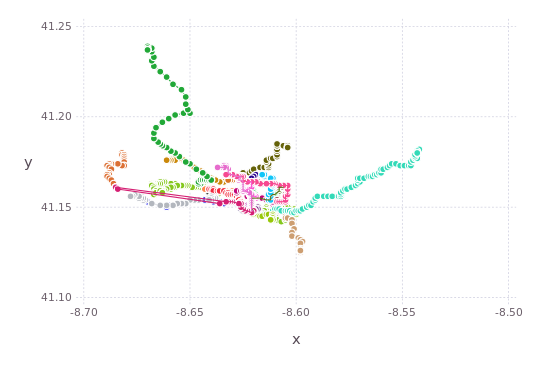

In [5]:
println("Showing arbitrary paths")

function plotCoords(coords, show_limit=40)
    num_paths = min(length(coords), show_limit)
    num_coords = length(coords)
    coordsToPlot = coords[randperm(num_coords)[1:num_paths]]
    layers = [layer(x=round(c'[:,1],3),y=round(c'[:,2],3),Geom.point, Geom.path, Theme(default_color=RGB(rand(3)...))) for c in coordsToPlot]
    Gadfly.plot(layers...) 
end

taxi_id = taxi_df[:TAXI_ID][11]
plotCoords(taxi_df[:COORDS][taxi_df[:TAXI_ID] .== taxi_id][1:30])

Plotting start and end points


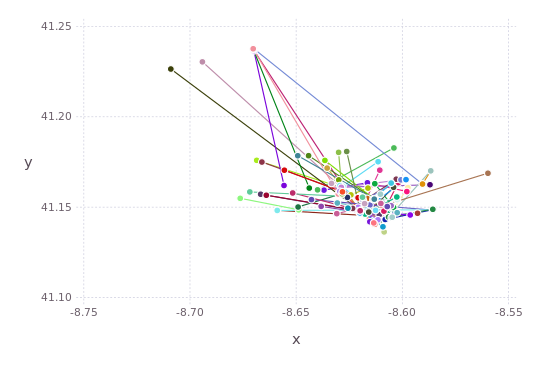

In [11]:
println("Plotting start and end points")

function plotStartAndEndPoints(coords)
    points = [[x[:,1] x[:,end]]' for x in coords]
    colors = [RGB(rand(3)...) for _ in points]
    
    layers = [layer(x=round(p[:,1],5),y=round(p[:,2],5), Geom.point, Geom.path, Theme(default_color=RGB(rand(3)...))) for p in points]
    Gadfly.plot(layers...) 
end

taxi_id = taxi_df[:TAXI_ID][11]
plotStartAndEndPoints(taxi_df[taxi_df[:TAXI_ID] .== taxi_id,:][:COORDS][100:180])


Plotting paths for driving looking at start distance
test path size: 33 partial path size: 13


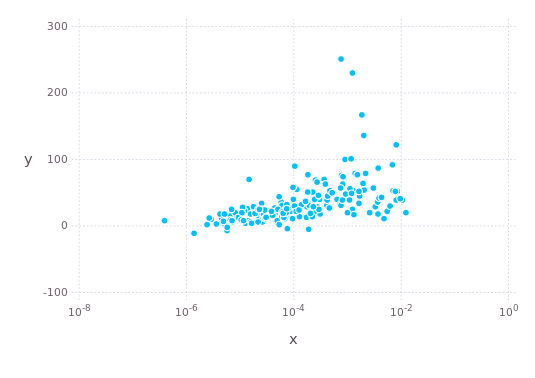

In [91]:
println("Plotting paths for driving looking at start distance")

function plotCoords(coords, show_limit=40)
    num_paths = min(length(coords), show_limit)
    num_coords = length(coords)
    coordsToPlot = coords[randperm(num_coords)[1:num_paths]]
    layers = [layer(x=round(c'[:,1],3),y=round(c'[:,2],3),Geom.point, Geom.path, Theme(default_color=RGB(rand(3)...))) for c in coordsToPlot]
    Gadfly.plot(layers...) 
end

taxi_id = taxi_df[:TAXI_ID][11]
test_path = taxi_df[taxi_df[:TAXI_ID] .== taxi_id,:][:COORDS][248]
a_taxi_df = taxi_df[taxi_df[:TAXI_ID] .== taxi_id,:][1:200,:]
println("test path size: ", size(test_path, 2), " partial path size: ", int(0.40*size(test_path,2)))
test_path = test_path[:,1:int(0.4*size(test_path,2))]

#a_taxi_df[:inv_DTW] = [float(1/sequenceCompare.DTWDistance(train_path, test_path)) for train_path in a_taxi_df[:COORDS]]
a_taxi_df[:inv_DTW] = [float(1/sequenceCompare.DTWDistance(train_path, test_path[:,1:min(end,size(train_path,2)+2)], 1)) for train_path in a_taxi_df[:COORDS]]
a_taxi_df[:NUM_COORDS_DIFF] = [float(n-size(test_path,2)) for n in a_taxi_df[:NUM_COORDS]]
a_taxi_df[:START_DIFF] = [float(euclideanDist(test_path[:,1], p)+0.000001) for p in a_taxi_df[:START]]
a_taxi_df[:START_DTW_score] = a_taxi_df[:inv_DTW] ./ a_taxi_df[:START_DIFF]
a_taxi_df[:inv_START_DTW_score] = a_taxi_df[:START_DIFF] ./ a_taxi_df[:inv_DTW]
sort!(a_taxi_df, cols=[:inv_DTW], rev=true)
p1 = Gadfly.plot(layer(x=1:398, y=a_taxi_df[:inv_DTW], Geom.point), Scale.y_log10)
p2 = Gadfly.plot(layer(x=1:398, y=a_taxi_df[:NUM_COORDS], Geom.point))
p3 = Gadfly.plot(layer(x=a_taxi_df[:inv_DTW], y=a_taxi_df[:NUM_COORDS_DIFF], Geom.point), Scale.x_log10)
p4 = Gadfly.plot(layer(x=1./a_taxi_df[:START_DIFF], y=a_taxi_df[:NUM_COORDS_DIFF], Geom.point))
p5 = Gadfly.plot(layer(x=a_taxi_df[:inv_START_DTW_score], y=a_taxi_df[:NUM_COORDS_DIFF], Geom.point), Scale.x_log10)
vstack(p5)
#a_taxi_df[:NUM_COORDS]

In [66]:
df = DataFrame(A = [1,2,3], B = [1,10,100])
df[:A] ./ df[:B]

3-element DataArray{Float64,1}:
 1.0 
 0.2 
 0.03

In [34]:
function euclideanDist(p1, p2)
    return sqrt((p1[1]-p2[1])^2 + (p1[2]-p2[2])^2)
end

s1, s2 = taxi_df[:START][13], taxi_df[:START][42]
euclideanDist(s1,s2)

0.04586648040781201

#Visualization


## Math
Grid up the map 
$ M = \left( \begin{array}{ccc}
m_{1,1} & \cdots & m_{1,n} \\
\vdots & \ddots & \vdots \\
m_{n,1} & \cdots & m_{n,n} \end{array} \right) $ \

Certain points will have a much higher "ending prior"
$ Pr(p_{i,j} = END) = $ No. of paths that end here / No. of paths that pass through here

We also could empose a markov assumption:
$ Pr(p_k = m_{i,j} | p_{k-1} = m_{i-1,j})$

This problem can be seen as a markov model then.  We could use MRF or CRF that predict vector of direction.

Could also empose start/end priors:
$ Pr(p_k = dest_j | p_0 = src_j) $

* Instead of having a list of coordinates, it may make more sense to map trips to a sequence of interest points:
Points that occur with med/high frequency.  This will remove alot of noise and simplify paths.

* Idea: use k-means on the coordinate set to find K most common points on the map $p_1 \cdots p_K$, we can re-encode each path as $c_i^* = arg\min_{k} {|p_k - c_i|}$. We could collapse sequences of repeated elements for simplicity, optionally encoding as (c_i, \# times)


__Idea__.  __find the conduits__.  The longest frequently traveled roads where most people that enter will leave.  For a new one, if we see them entering the conduit, we can be confident they will exit the conduit.

In [156]:
# deleting rows/ filtering rows from a dataframe
is_even = x -> x % 2 .== 0
df = DataFrame(A = [11,12,13,14,15], B = [1,2,3,4,5])
#deleterows!(df, find(is_even(df[:A])))
df[is_even(df[:A]),:]

,A,B
1,12,2
2,14,4


In [174]:
#deleterows!(taxi_df, find(df[:NUM_COORDS]))

taxi_df[taxi_df[:NUM_COORDS] .== 0,:]
#deleterows!(taxi_df, find(taxi_df[:NUM_COORDS] .== 0))

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,COORDS,NUM_COORDS
